### Defining and displaying state vectors

The IBM Qiskit's `Statevector` can be used to define defining and manipulating quantum state vectors. The following code defines the qubit state vectors $u$, $v$, and $w$, which are $\begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix}$, $\begin{pmatrix} \frac{1 + 2i}{3} \\ -\frac{2}{3} \end{pmatrix}$, and $\begin{pmatrix} \frac{1}{3} \\ \frac{2}{3} \end{pmatrix}$, respectively.

In [1]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

Note that Numpy's `sqrt` is used to compute the square roots the state vector $u$.

IBM Qiskit's `Statevector` also provides a `draw` method to allow displaying the state vectors, in either $\LaTeX$ or `text` format.

In [2]:
display(u.draw('latex'))
display(v.draw('latex'))
display(w.draw('latex'))

display(u.draw('text'))
display(v.draw('text'))
display(w.draw('text'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[0.70710678+0.j,0.70710678+0.j]

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

[0.33333333+0.j,0.66666667+0.j]

And it is also possible to see if a state vector is a valid quantum state vector (i.e., if its Euclidean norm is 1) using the `is_valid()` method:

In [3]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

### Simulating measurements using `Statevector`

First create a state vector:


In [4]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

Then, `measure()` can be used to simulate a standard basis measurement, and it returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [5]:
v.measure()

(np.str_('0'),
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

Two things to note:

1. The measurement is probabilistic, so the result of the measurement may change each time `measure()` is called.
2. There are two possible new quantum state for the state vector $v$ defines above, which are:

In [6]:
Statevector([0.4472136+0.89442719j, 0.       +0.j        ]).draw("latex")

<IPython.core.display.Latex object>

or $\frac{1 + 2i}{\sqrt{5}}|0\rangle$ (instead of $|0\rangle$), and:

In [7]:
Statevector([ 0.+0.j, -1.+0.j]).draw("latex")

<IPython.core.display.Latex object>

(instead of $|1\rangle$). They are, in fact, equivalent to the corresponding standard basis state (and it can be verified by checking the actual probabilities, which gives $|\frac{1 + 2i}{\sqrt{5}}|^2 = 1$ and $|-1|^2 = 1$).

The `Statevector` also has a method `sample_counts` that simulates any number of measurements and returns the counts of each possible outcome. And it can be plotted to a graph for better visualization.

{np.str_('0'): np.int64(554), np.str_('1'): np.int64(446)}

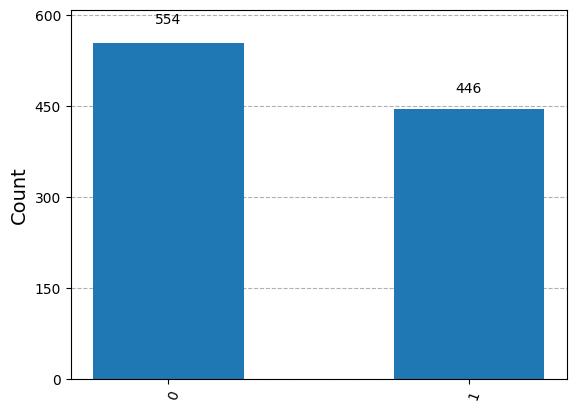

In [8]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

The trial above gives 538/1000 and 462/1000 for outcomes 0 and 1. The theoretical probabilities for these measurements are $|\frac{1 + 2i}{3}|^2 = 5/9 \approx 0.5556$ and $|-2/3|^2 = 4/9 \approx 0.4444$ respectively, and the results are close to these values.

### Performing operations with `Operator` and `Statevector`

QisKit's `Operator` class can be used to define Unitary operations:


In [9]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

### Quantum Circuits (Look Ahead)

The Qiskit's `QuantumCircuit` class can be used to compose qubit unitary operations by defining a quantum circuit, which is, in this demo, simply a sequence of unitary operations performed on a single qubit.

In [10]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

The operations in the circuit above is applied sequentially, from top to bottom for the code and from left to right for the circuit diagram. A quantum state vector can be first defined and then evolve according to the sequence of operations in the circuit.

In [11]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

And this circuit operation can also be applied and sampled for multiple times through `sample_counts` method:

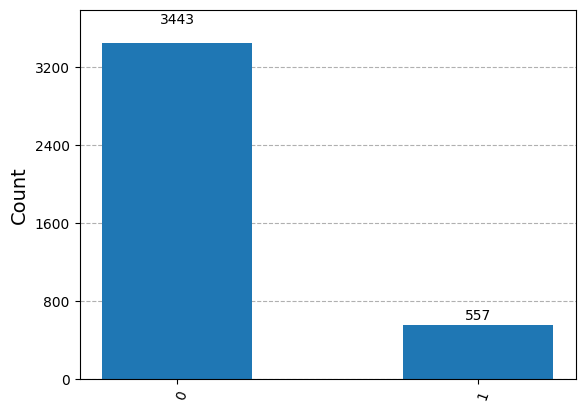

In [12]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)